In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import pearsonr, zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [2]:
#Datos de propiedades
ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)

In [3]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [4]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [5]:
df = df.select_dtypes(exclude=['object'])

In [6]:
#Buscar nulos
df.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [7]:
#Borrar nulos
df = df.dropna()
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


Se borran datos que no son relevantes (como la longitud y longitud, que nos dicen coordenadas pero no las condiciones del sector) y algunas que son administrativas y arbitrarias (como el property count y el código postal)

In [8]:
df=df.drop(['Postcode'], axis=1)
df=df.drop(['Longtitude'], axis=1)
df=df.drop(['Propertycount'], axis=1)

In [9]:
df=df.drop(['Lattitude'], axis=1)


In [10]:
df

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0
2,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0
4,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0
6,3,1876000.0,2.5,4.0,2.0,0.0,245.0,210.0,1910.0
7,2,1636000.0,2.5,2.0,1.0,2.0,256.0,107.0,1890.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,2.0,1.0,1.0,210.0,79.0,2006.0
13573,4,635000.0,14.7,4.0,2.0,1.0,662.0,172.0,1980.0
13576,3,1031000.0,6.8,3.0,2.0,2.0,333.0,133.0,1995.0
13578,4,2500000.0,6.8,4.0,1.0,5.0,866.0,157.0,1920.0


<Axes: >

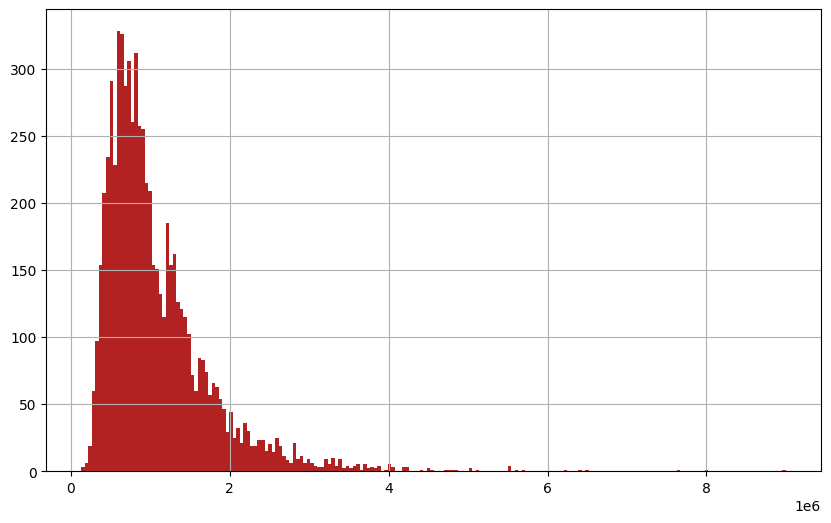

In [12]:
#Histograma
df.Price.hist(color='firebrick', bins=200, figsize=(10, 6))

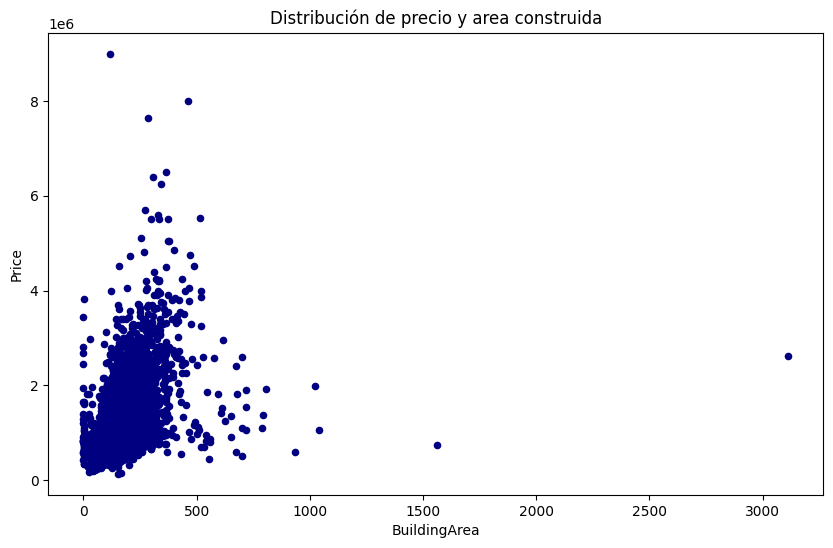

In [13]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

Viendo el diagrama anterior, se asume que las casas con área mayor a 750 son valores extremos

In [14]:
#Datos con área menor o igual a 800
df0 = df[df["BuildingArea"]<=750]
df0

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0
2,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0
4,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0
6,3,1876000.0,2.5,4.0,2.0,0.0,245.0,210.0,1910.0
7,2,1636000.0,2.5,2.0,1.0,2.0,256.0,107.0,1890.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,2.0,1.0,1.0,210.0,79.0,2006.0
13573,4,635000.0,14.7,4.0,2.0,1.0,662.0,172.0,1980.0
13576,3,1031000.0,6.8,3.0,2.0,2.0,333.0,133.0,1995.0
13578,4,2500000.0,6.8,4.0,1.0,5.0,866.0,157.0,1920.0


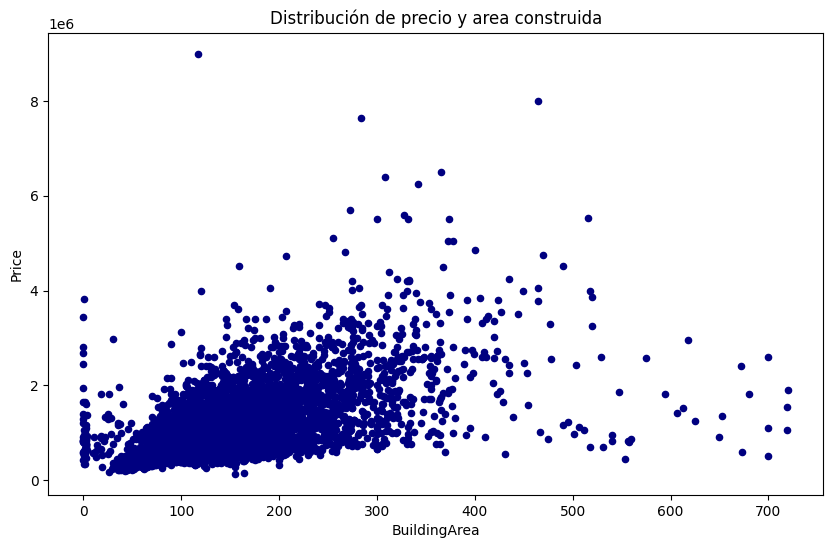

In [15]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df0.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [16]:
#Datos con área cero
dfzero = df0[df0["BuildingArea"]<=15]
len(dfzero)

56

In [17]:
#Se eliminan los registros de menos de 15 mts cuadrados de area
df0 = df0[df0["BuildingArea"]>4]
df0

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0
2,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0
4,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0
6,3,1876000.0,2.5,4.0,2.0,0.0,245.0,210.0,1910.0
7,2,1636000.0,2.5,2.0,1.0,2.0,256.0,107.0,1890.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,2.0,1.0,1.0,210.0,79.0,2006.0
13573,4,635000.0,14.7,4.0,2.0,1.0,662.0,172.0,1980.0
13576,3,1031000.0,6.8,3.0,2.0,2.0,333.0,133.0,1995.0
13578,4,2500000.0,6.8,4.0,1.0,5.0,866.0,157.0,1920.0


In [18]:
#Se eliminan todos los datos que estén más allá de 3 desviaciones estándar
df0 = df0[(np.abs(zscore(df0['BuildingArea']))<=3)]
df0

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0
2,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0
4,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0
6,3,1876000.0,2.5,4.0,2.0,0.0,245.0,210.0,1910.0
7,2,1636000.0,2.5,2.0,1.0,2.0,256.0,107.0,1890.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,2.0,1.0,1.0,210.0,79.0,2006.0
13573,4,635000.0,14.7,4.0,2.0,1.0,662.0,172.0,1980.0
13576,3,1031000.0,6.8,3.0,2.0,2.0,333.0,133.0,1995.0
13578,4,2500000.0,6.8,4.0,1.0,5.0,866.0,157.0,1920.0


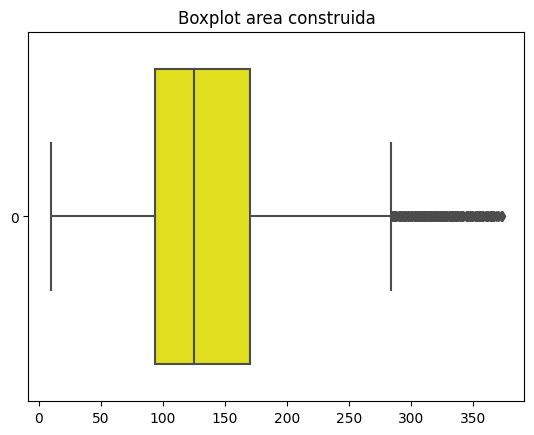

In [19]:
#Boxplot
ax = sb.boxplot(data=df0['BuildingArea'].values, orient='h', color='yellow')
ax.set_title('Boxplot area construida');
plt.show()

se comparan las variables que quedan para comprobar cuales son relevantes

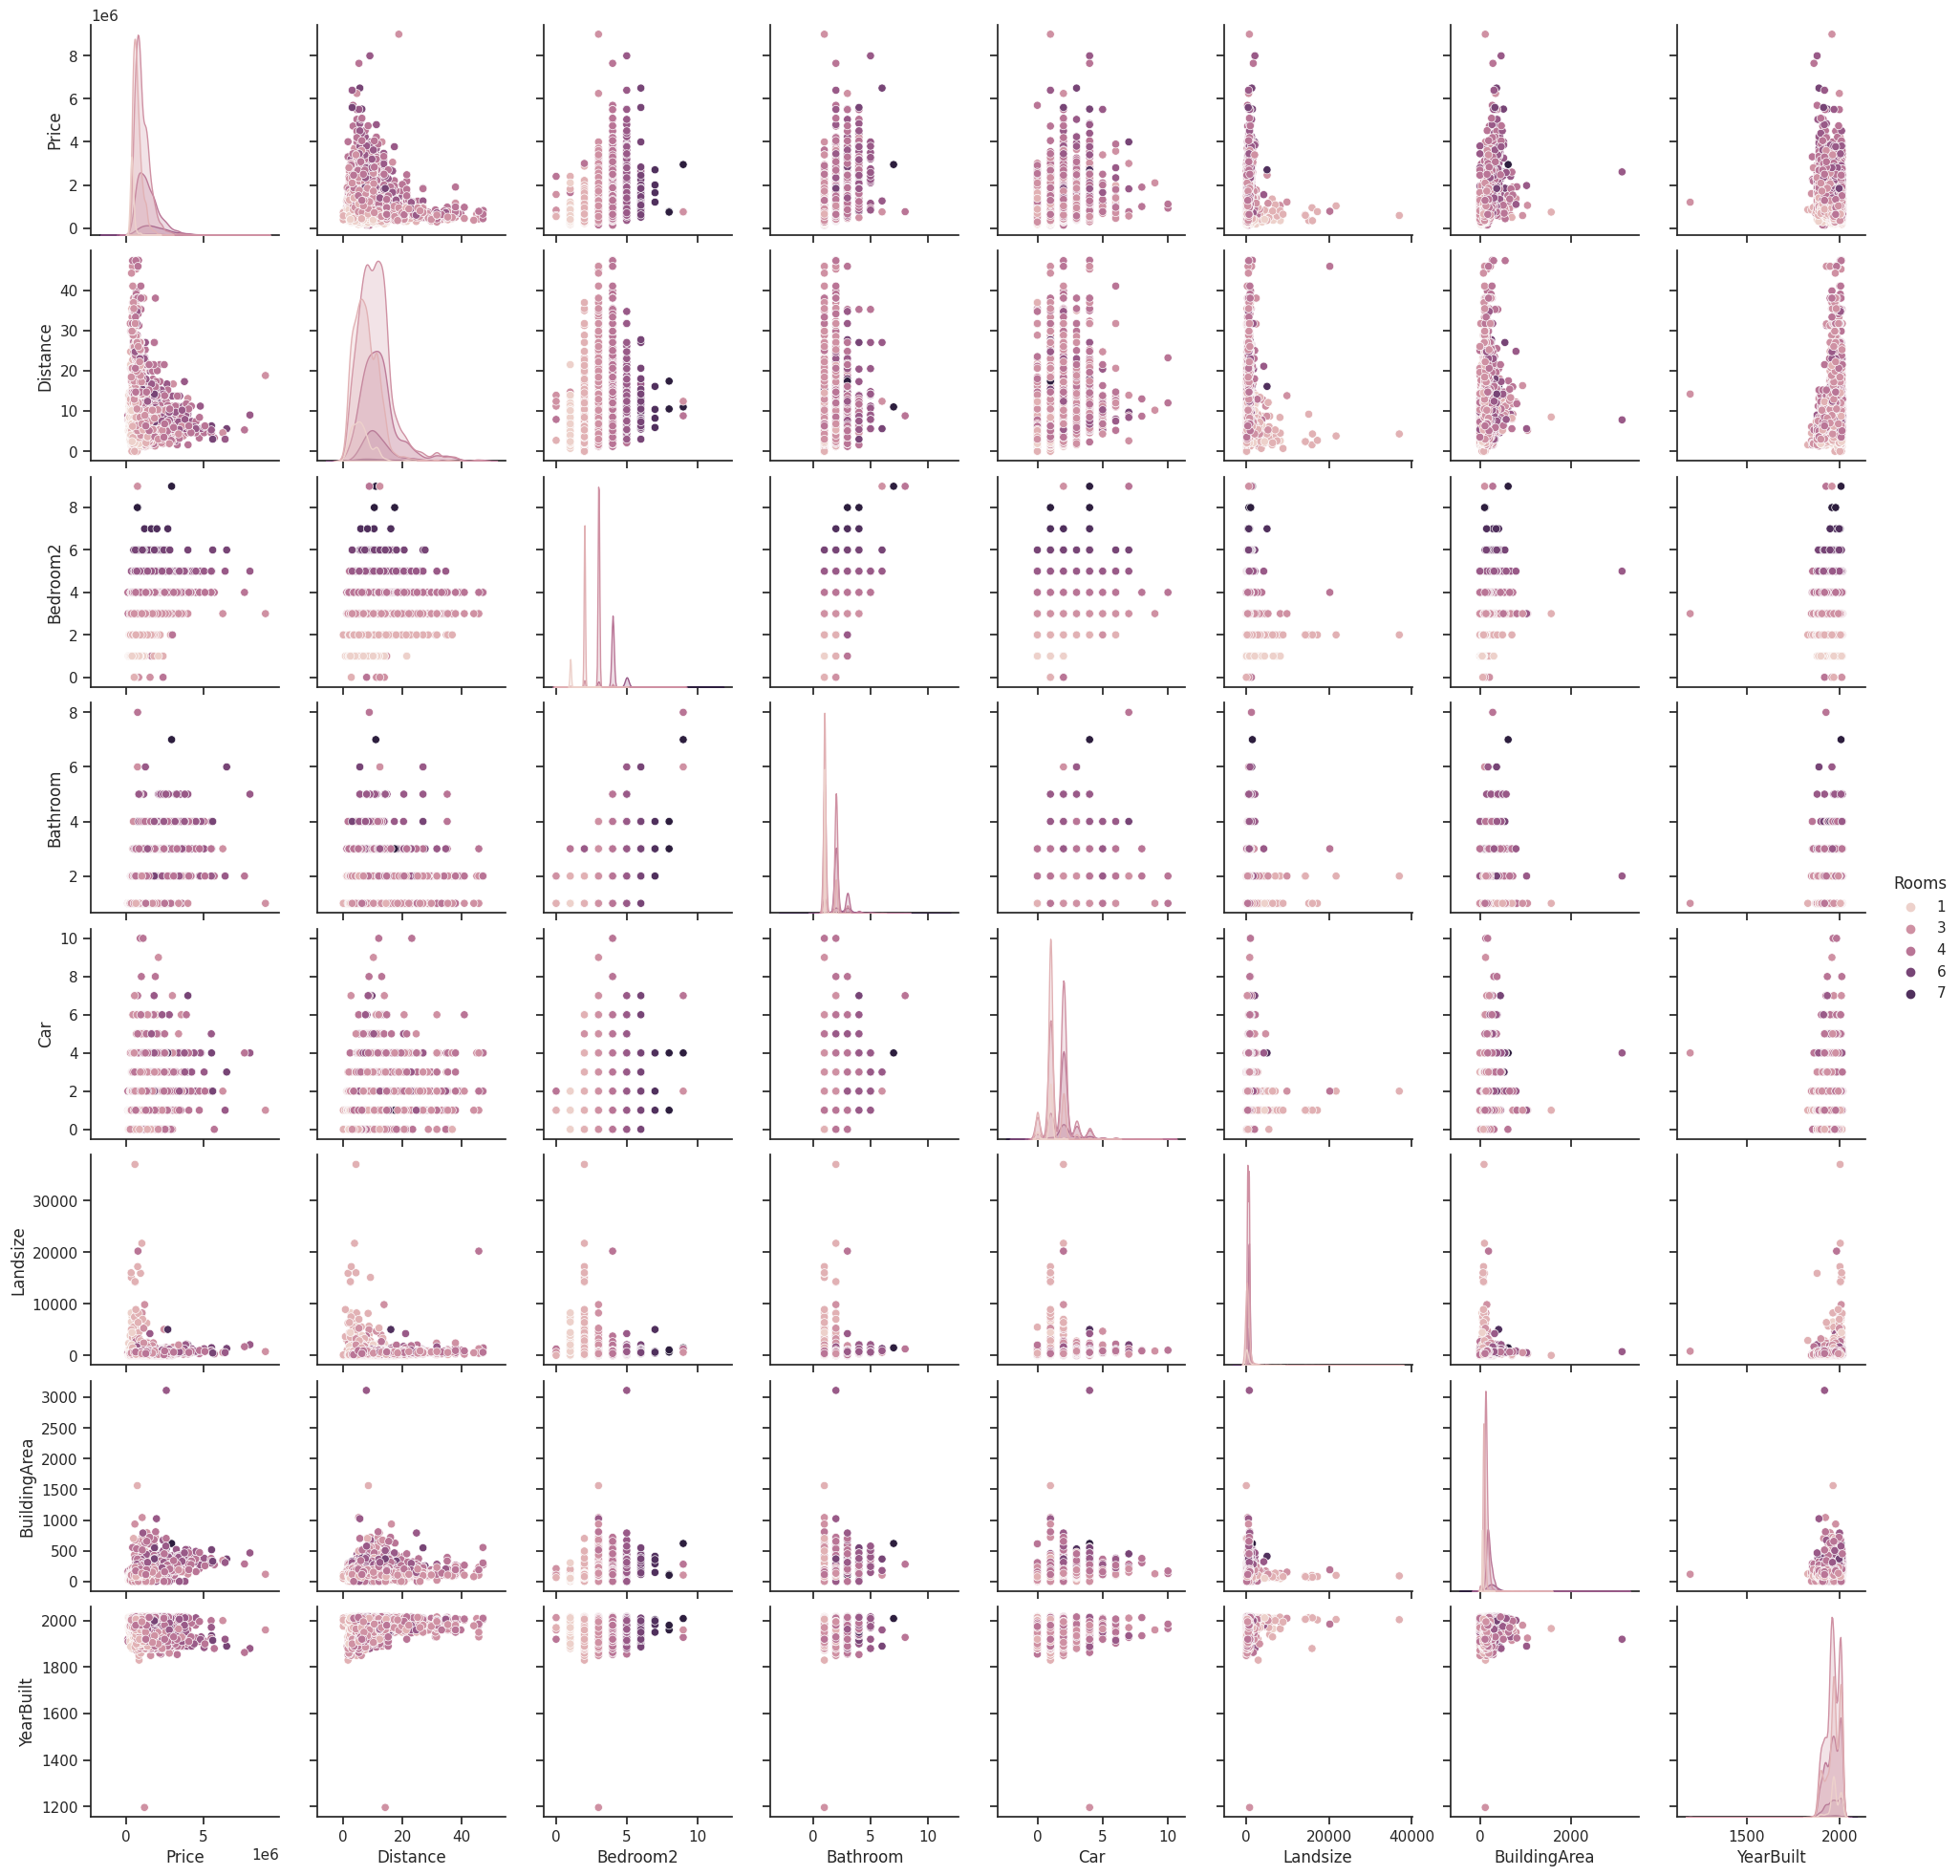

In [20]:
#Múltiples diagramas por parejas en el dataset original
sb.set_theme(style="ticks")
sb.pairplot(df, hue='Rooms')

In [21]:
#Correlación entre variables
corr_test = pearsonr(x = df['BuildingArea'], y = df['Price'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.5204915813803511
P-value:  0.0


<Axes: title={'center': 'Pearson Correlation of Features'}>

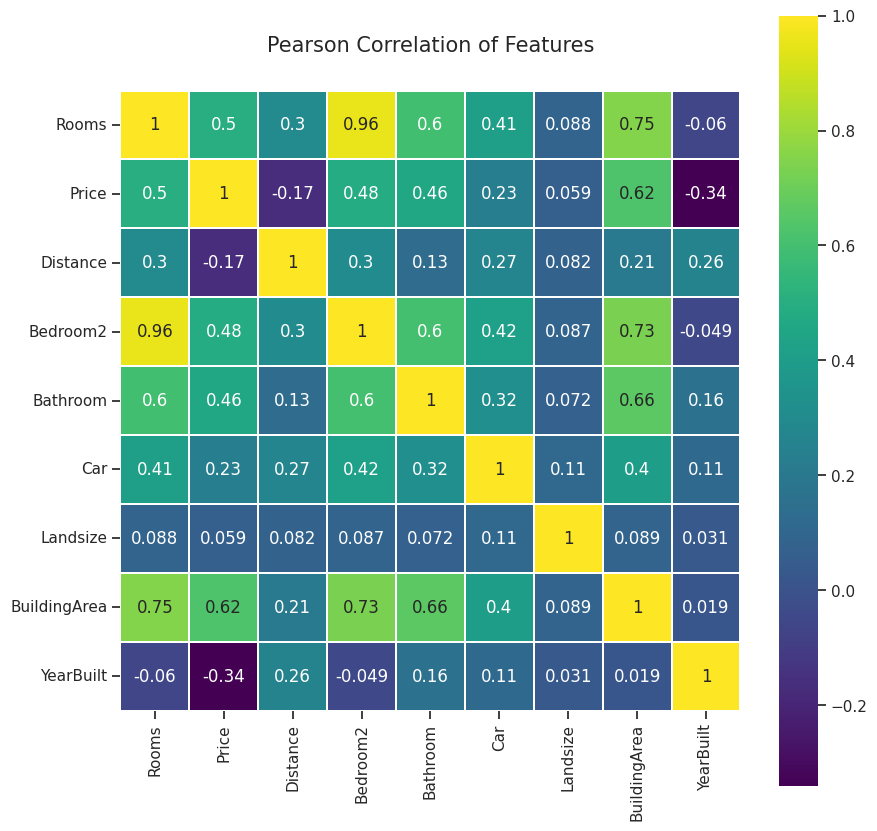

In [22]:
colormap = plt.cm.viridis
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df0.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Se va a analizar los valores que más se relacionan con el precio

# Año de construcción

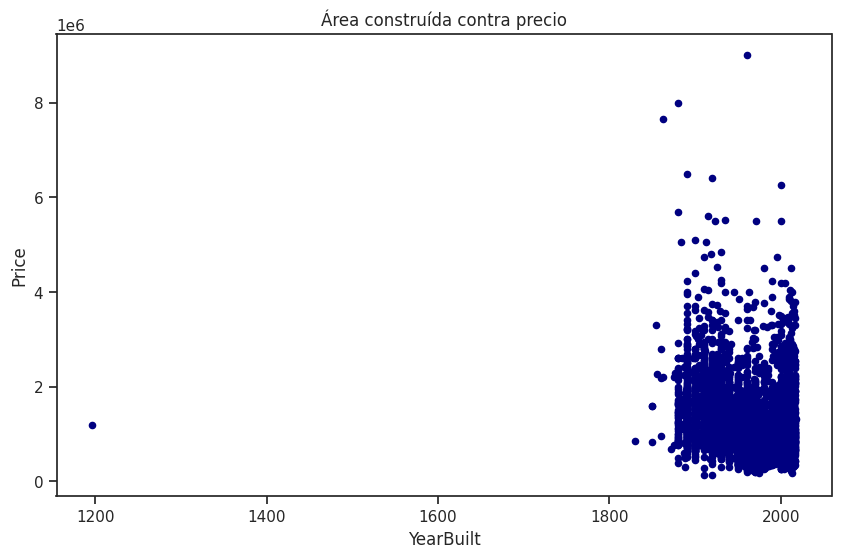

In [32]:
#año de construccion
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x = 'YearBuilt', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Área construída contra precio');

In [27]:
#viendo el gráfico, se decide eliminar los edificios construidos antes de 1850
df1 = df[df["YearBuilt"]>1875]
df1

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0
2,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0
4,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0
6,3,1876000.0,2.5,4.0,2.0,0.0,245.0,210.0,1910.0
7,2,1636000.0,2.5,2.0,1.0,2.0,256.0,107.0,1890.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,2.0,1.0,1.0,210.0,79.0,2006.0
13573,4,635000.0,14.7,4.0,2.0,1.0,662.0,172.0,1980.0
13576,3,1031000.0,6.8,3.0,2.0,2.0,333.0,133.0,1995.0
13578,4,2500000.0,6.8,4.0,1.0,5.0,866.0,157.0,1920.0


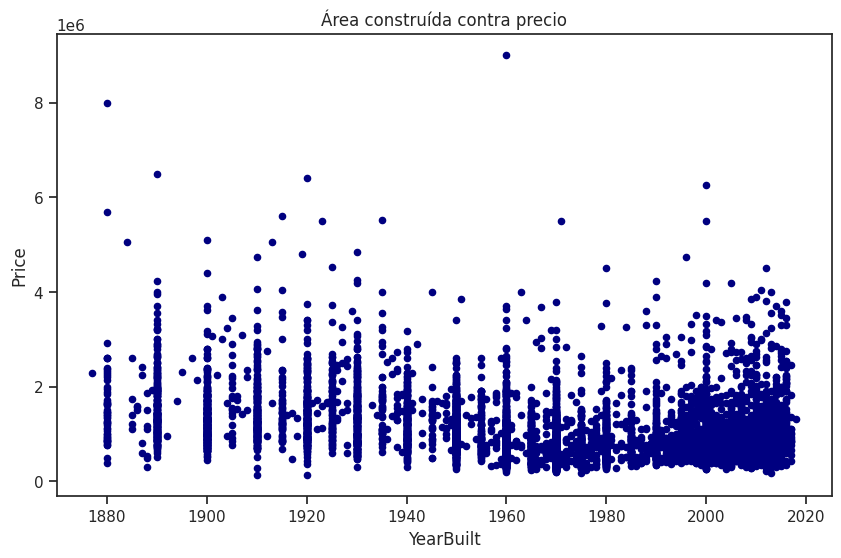

In [29]:
#año de construccion
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df1.plot(x = 'YearBuilt', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Área construída contra precio');

Se observa que la mayoría de las construcciones registradas son de años recientes. Se evidencia que hay construcciones de valores altos y bajos sin importar la década en la que se revise. Sin embargo, se puede decir que gran parte de las propiedades más costosas son de antes de la década de 1930.

# Distancia del centro

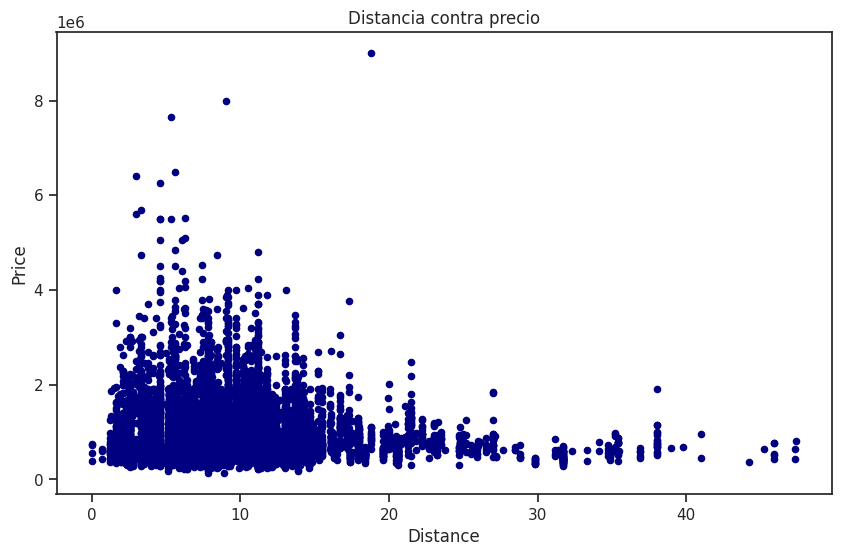

In [33]:
#Distancia
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x = 'Distance', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distancia contra precio');

In [36]:
#Se eliminan los datos que estén más allá de 3 desviaciones estándar
df2 = df[(np.abs(zscore(df['Price']))<=3)]
df2

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0
2,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0
4,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0
6,3,1876000.0,2.5,4.0,2.0,0.0,245.0,210.0,1910.0
7,2,1636000.0,2.5,2.0,1.0,2.0,256.0,107.0,1890.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,2.0,1.0,1.0,210.0,79.0,2006.0
13573,4,635000.0,14.7,4.0,2.0,1.0,662.0,172.0,1980.0
13576,3,1031000.0,6.8,3.0,2.0,2.0,333.0,133.0,1995.0
13578,4,2500000.0,6.8,4.0,1.0,5.0,866.0,157.0,1920.0


In [38]:
#Se eliminan los registros con distancia igual a cero
df2 = df2[df2["Distance"]>0]
df2

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0
2,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0
4,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0
6,3,1876000.0,2.5,4.0,2.0,0.0,245.0,210.0,1910.0
7,2,1636000.0,2.5,2.0,1.0,2.0,256.0,107.0,1890.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,2.0,1.0,1.0,210.0,79.0,2006.0
13573,4,635000.0,14.7,4.0,2.0,1.0,662.0,172.0,1980.0
13576,3,1031000.0,6.8,3.0,2.0,2.0,333.0,133.0,1995.0
13578,4,2500000.0,6.8,4.0,1.0,5.0,866.0,157.0,1920.0


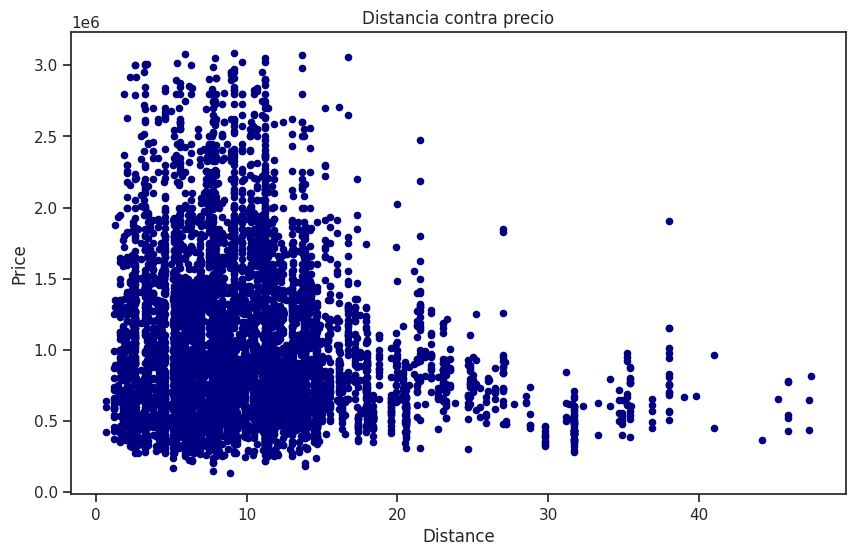

In [39]:
#Distancia
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df2.plot(x = 'Distance', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distancia contra precio');

Se observa que cerca del centro de la ciudad hay una gran variedad de costos, desde los más bajos a los más altos. Por lo tanto, la distancia por sí sola no define el costo y requiere otras variables.

Sin embargo, aunque no sea el único factor que afecta el precio, tiene cierta influencia debido a que las propiedades más costosas están cerca del centro, mientras que en las periferias no hay tantas propiedades costosas.

# Cantidad de baños contra precio



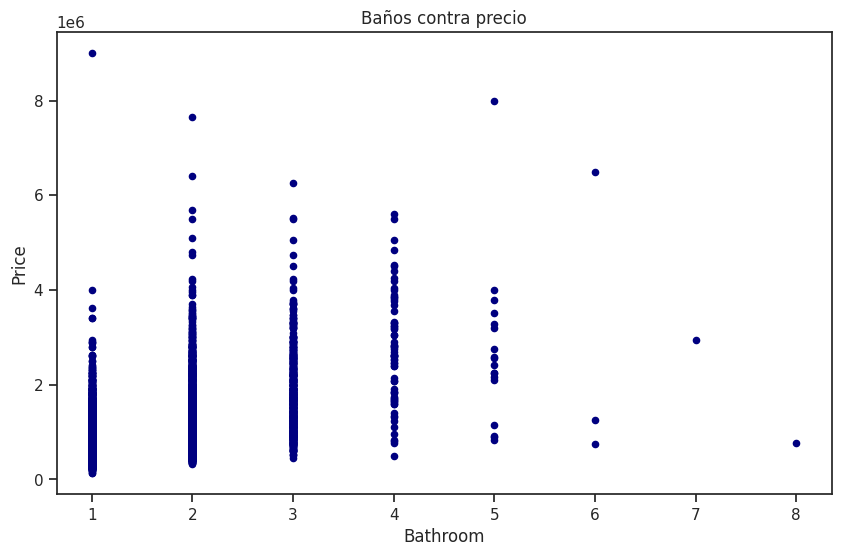

In [42]:
#Cantidad de baños
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x = 'Bathroom', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Baños contra precio');

In [43]:
#agrupar por cantidad de baño y obtener un promedio
grouped = df.groupby(['Bathroom'])

average_sales = grouped.mean()

In [44]:
average_sales

,Rooms,Price,Distance,Bedroom2,Car,Landsize,BuildingArea,YearBuilt
Bathroom,,,,,,,,
1.0,2.445516,8.215943e+05,9.243161,2.425653,1.328036,423.740352,103.190234,1957.818672
2.0,3.380508,1.220471e+06,11.236632,3.346154,1.822255,535.765123,169.765850,1970.949216
3.0,4.170093,1.765189e+06,10.538505,4.114019,2.170093,614.310280,245.409159,1973.557009
4.0,4.628571,2.729083e+06,10.142857,4.600000,2.700000,743.328571,309.025571,1973.928571
5.0,4.944444,2.704528e+06,13.327778,4.888889,2.555556,850.722222,388.627778,1990.166667
6.0,4.666667,2.837000e+06,15.000000,6.666667,2.666667,942.000000,215.333333,1936.666667
7.0,8.000000,2.950000e+06,11.000000,9.000000,4.000000,1472.000000,618.000000,2009.000000
8.0,4.000000,7.600000e+05,8.800000,9.000000,7.000000,1254.000000,280.000000,1928.000000


Se observa que la cantidad de baños por sí sola no afecta el precio de las viviendas